# Using GraphiPy to extract data from Reddit

In [1]:
from graphipy.graphipy import GraphiPy

In [2]:
# create GraphiPy object (default to Pandas)
graphipy = GraphiPy()

# Creating the Reddit Object

GraphiPy's Reddit object needs CLIENT_ID, CLIENT_SECRET, USER_AGENT, USERNAME, and PASSWORD in order to connect to Reddit's API:
- To get CLIENT_ID and CLIENT_SECRET, login to Reddit and go to https://www.reddit.com/prefs/apps/ and click the "create application" button at the bottom of the page.
- USER_AGENT is a very brief description of what your application is going to do.
- Username is your Reddit username.
- Password is your Reddit password.

In [3]:
# The reddit API needs these credentials
CLIENT_ID = ""
CLIENT_SECRET = ""
USER_AGENT = ""
USERNAME = ""
PASSWORD = ""
reddit_api_credentials = {
    "client_id": CLIENT_ID,
    "client_secret": CLIENT_SECRET,
    "user_agent": USER_AGENT,
    "username": USERNAME,
    "password": PASSWORD
}

# create the reddit object
reddit = graphipy.get_reddit(reddit_api_credentials)

# Find Subreddits by Name

### def fetch_subreddits_by_name(graph, keyword, limit=20,  nsfw=True, exact=False)

Optional parameters:
- If nsfw is set to True, the result will include subreddits that are Not Safe For Work
- if exact is set to False, will only return subreddits that exactly matches the keyword

Types of node returned:
- subreddit

No edges returned

In [4]:
keyword = "python"

# Every function call modifies the graph that is sent as input
# subreddits_name = graphipy.create_graph()
# reddit.fetch_subreddits_by_name(subreddits_name, keyword, limit=3)

# However, it also returns the graph modified so you can assign it to other variables like so:
subreddits_name = reddit.fetch_subreddits_by_name(graphipy.create_graph(), keyword, limit=5)

In [5]:
# To get the list of available nodes
# However, there's only one type in this case
print(subreddits_name.get_nodes().keys())

dict_keys(['subreddit'])


In [6]:
# You can get the dataframe from Pandas by specifying the node
subreddit_df = subreddits_name.get_df("subreddit")

In [7]:
subreddit_df.head(5)

,_id,Label,label_attribute,notification_level,user_flair_background_color,wls,banner_img,user_sr_theme_enabled,user_flair_text,submit_text_html,...,accounts_active_is_fuzzed,advertiser_category,public_description,link_flair_enabled,allow_images,videostream_links_count,comment_score_hide_mins,show_media_preview,submission_type,user_is_subscriber
0,2qh0y,Python,subreddit,None,None,6,,True,None,None,...,False,Technology,"news about the dynamic, interpreted, interacti...",True,True,0,0,True,any,False
1,2tqzl,python101,subreddit,None,None,None,,True,None,None,...,False,None,,False,True,0,0,True,any,False
2,3l7v1,Python2,subreddit,None,None,None,,True,None,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",...,False,None,A place to discuss Python 2.7 without all of h...,False,False,0,0,True,any,False
3,3evbu,pythontips,subreddit,None,None,None,,True,None,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",...,False,None,A place to get a quick fix of python tips and ...,True,False,NaN,0,True,self,False
4,3649w,pythoncoding,subreddit,None,None,None,,True,None,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",...,False,None,A subreddit for python developers to share art...,False,False,0,1440,True,any,False


In [8]:
# show the attributes of this node
subreddit_df.iloc[0]

_id                                                                        2qh0y
Label                                                                     Python
label_attribute                                                        subreddit
notification_level                                                          None
user_flair_background_color                                                 None
wls                                                                            6
banner_img                                                                      
user_sr_theme_enabled                                                       True
user_flair_text                                                             None
submit_text_html                                                            None
user_flair_css_class                                                        None
user_flair_template_id                                                      None
user_is_banned              

In [9]:
# we can use the display name of the subreddit to look at its submissions
subreddit_df.display_name

0                Python
1             python101
2               Python2
3            pythontips
4          pythoncoding
5       PythonProjects2
6         python_netsec
7    pythonforengineers
8             pythondev
9               python3
Name: display_name, dtype: object

# Find Submissions in a Subreddit

### def fetch_subreddit_submissions(graph, keyword="", subreddit_name="all", limit=20, sort="hot", time_filter="month")

Optional parameters:
- limit is the number of submissions returned.
- sort (hot, top, new, controversial, rising) affects the order of submissions returned.
- if keyword is empty, returns the [limit] first submissions in the subreddit sorted by [sort].
- time_filter (hour, day, week, month, year, all) shows the submissions that is posted within time_filter.

Types of node returned:
- subreddit
- redditor
- submission

Types of edge returned:
- POSTED
- SUBMISSION_CREATED_BY
- ON
- HAS_SUBMISSION

In [10]:
# let's try searching for submissions in Python which is the first result!
subreddit_to_search = subreddit_df.display_name[0]

# Call the appropriate function
subreddit_submissions = reddit.fetch_subreddit_submissions(
        graphipy.create_graph(), subreddit_name=subreddit_to_search, limit=3)

In [11]:
# Get all the node dataframes available from the query
ss_nodes = subreddit_submissions.get_nodes()

# Find out list of available nodes
print(ss_nodes.keys())

dict_keys(['subreddit', 'redditor', 'submission'])


In [12]:
ss_nodes["submission"].head()

,_id,Label,label_attribute,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,...,author_flair_text_color,permalink,whitelist_status,stickied,url,subreddit_subscribers,created_utc,media,is_video,media_metadata
0,9o5w2z,submission_9o5w2z,submission,None,Python,Please read the rules \- they've updated sligh...,t2_628u,False,None,0,...,dark,/r/Python/comments/9o5w2z/rpython_official_job...,all_ads,True,https://www.reddit.com/r/Python/comments/9o5w2...,292661,1539547719.0,None,False,NaN
1,9wpcvt,submission_9wpcvt,submission,None,Python,Tell /r/python what you're working on this wee...,t2_6l4z3,False,None,0,...,None,/r/Python/comments/9wpcvt/whats_everyone_worki...,all_ads,True,https://www.reddit.com/r/Python/comments/9wpcv...,292661,1542118175.0,None,False,NaN
2,9xbq05,submission_9xbq05,submission,None,Python,,t2_dbnjs7,False,None,0,...,None,/r/Python/comments/9xbq05/flask_app_to_extract...,all_ads,False,https://i.redd.it/h4yzvy8w8iy11.png,292661,1542292724.0,None,False,NaN
3,9xbx6g,submission_9xbx6g,submission,None,Python,,t2_535wk,False,None,0,...,None,/r/Python/comments/9xbx6g/python_3_is_the_defa...,all_ads,False,https://access.redhat.com/documentation/en-us/...,292661,1542294149.0,None,False,NaN
4,9xd5rj,submission_9xd5rj,submission,None,Python,Probably not so useful if you use an IDE which...,t2_9y98d,False,None,0,...,None,/r/Python/comments/9xd5rj/prettyerrors_making_...,all_ads,False,https://www.reddit.com/r/Python/comments/9xd5r...,292661,1542302388.0,None,False,None


In [13]:
ss_nodes["redditor"].head()

,_id,Label,label_attribute,is_employee,icon_img,pref_show_snoovatar,name,is_friend,created,has_subscribed,hide_from_robots,created_utc,link_karma,comment_karma,is_gold,is_mod,verified,subreddit,has_verified_email
0,628u,aphoenix,redditor,False,https://a.thumbs.redditmedia.com/wSlep7xMBqlqI...,True,aphoenix,False,1147838967.0,True,False,1147810167.0,31954,113301,True,True,True,"{'default_set': True, 'user_is_contributor': F...",True
1,6l4z3,AutoModerator,redditor,False,https://www.redditstatic.com/avatars/avatar_de...,False,AutoModerator,False,1325769868.0,True,False,1325741068.0,1778,445850,True,True,False,None,True
2,dbnjs7,main_aisa_kyun_hoon,redditor,False,https://www.redditstatic.com/avatars/avatar_de...,False,main_aisa_kyun_hoon,False,1494021876.0,True,False,1493993076.0,696,167,False,False,True,"{'default_set': True, 'user_is_contributor': F...",False
3,535wk,milliams,redditor,False,https://www.redditstatic.com/avatars/avatar_de...,False,milliams,False,1302549662.0,True,False,1302520862.0,15941,4652,False,True,True,"{'default_set': True, 'user_is_contributor': F...",True
4,9y98d,-sideshow-,redditor,False,https://www.redditstatic.com/avatars/avatar_de...,False,-sideshow-,False,1356026437.0,True,False,1355997637.0,333,7984,False,True,False,None,True


In [14]:
ss_nodes["subreddit"].head()

,_id,Label,label_attribute,notification_level,user_flair_background_color,wls,banner_img,user_sr_theme_enabled,user_flair_text,submit_text_html,...,accounts_active_is_fuzzed,advertiser_category,public_description,link_flair_enabled,allow_images,videostream_links_count,comment_score_hide_mins,show_media_preview,submission_type,user_is_subscriber
0,2qh0y,Python,subreddit,None,None,6,,True,None,None,...,False,Technology,"news about the dynamic, interpreted, interacti...",True,True,0,0,True,any,False


In [15]:
# The same works with edges
ss_edges = subreddit_submissions.get_edges()
print(ss_edges.keys())

dict_keys(['posted', 'submission_created_by', 'on', 'has_submission'])


In [16]:
ss_edges["posted"].head()

,Source,Target,Label,label_attribute,_id
0,628u,9o5w2z,POSTED,POSTED,628u9o5w2zPOSTED
1,6l4z3,9wpcvt,POSTED,POSTED,6l4z39wpcvtPOSTED
2,dbnjs7,9xbq05,POSTED,POSTED,dbnjs79xbq05POSTED
3,535wk,9xbx6g,POSTED,POSTED,535wk9xbx6gPOSTED
4,9y98d,9xd5rj,POSTED,POSTED,9y98d9xd5rjPOSTED


# Find Comments in a Submission

### def fetch_submission_comments(graph, submission_id, limit=20, sort="top")

Optional parameters:
- limit is the number of comments returned.
- sort (best, top, new, controversial, old) affects the order of comments returned.

Types of node returned:
- subreddit
- redditor
- submission
- comment

Types of edge returned:
- POSTED
- SUBMISSION_CREATED_BY
- HAS_SUBMISSION
- COMMENTED
- COMMENT_CREATED_BY
- HAS_COMMENT
- ON_POST
- TO
- HAS_REPLY
- REPLIED

In [17]:
# Reddit GraphiPy also supports the ability to get comments from a submission
# Let's use the previous result!
ss_nodes["submission"].title

0                          r/Python official Job Board
1                What's everyone working on this week?
2    Flask app to extract palette of dominating col...
3    Python 3 is the default Python implementation ...
4     PrettyErrors - making python exceptions readable
Name: title, dtype: object

In [18]:
# I'm interested in what everyone is working on this week!
# To fetch the comments of that submission, we need its ID
submission_id = ss_nodes["submission"]._id[1]

submission_comments = reddit.fetch_submission_comments(graphipy.create_graph(), submission_id, limit=5)
sc_nodes = submission_comments.get_nodes()

# View the results
sc_nodes["comment"].head()

,_id,Label,label_attribute,subreddit_id,approved_at_utc,ups,mod_reason_by,banned_by,author_flair_type,removal_reason,...,subreddit,author_flair_text,created_utc,subreddit_name_prefixed,controversiality,depth,author_flair_background_color,mod_reports,mod_note,distinguished
0,e9mxcqt,comment_e9mxcqt,comment,t5_2qh0y,None,1,None,None,text,None,...,Python,None,1542139214.0,r/Python,0,0,None,[],None,None
1,e9mq1bp,comment_e9mq1bp,comment,t5_2qh0y,None,1,None,None,text,None,...,Python,None,1542133430.0,r/Python,0,0,None,[],None,None
2,e9ny36w,comment_e9ny36w,comment,t5_2qh0y,None,1,None,None,text,None,...,Python,None,1542172835.0,r/Python,0,0,None,[],None,None
3,e9rhrbi,comment_e9rhrbi,comment,t5_2qh0y,None,1,None,None,text,None,...,Python,None,1542307688.0,r/Python,0,0,None,[],None,None
4,e9mlvcy,comment_e9mlvcy,comment,t5_2qh0y,None,1,None,None,text,None,...,Python,None,1542130134.0,r/Python,0,0,None,[],None,None


# Find Redditor's Comment History

### def fetch_redditor_comments(graph, username, limit=20, sort="new", time_filter="month")

Optional parameters:
- limit is the number of comments returned.
- sort (hot, top, new, controversial) affects the order of comments returned.
- time_filter (hour, day, week, month, year, all) shows the comments that the user posted within time_filter.

Types of node returned:
- redditor
- comment

Types of edge returned:
- REPLIED
- COMMENT_CREATED_BY

In [19]:
# To fetch a redditor's comments, we need to specify the username of the account
# Let's try looking at the comment history of Reddit's admin, spez!
reddit_admin = "spez"
redditor_comments = reddit.fetch_redditor_comments(graphipy.create_graph(), reddit_admin, limit=5)

# Find Redditor's Submission History

### def fetch_redditor_submissions(graph, username, limit=20, sort="new", time_filter="month")

Optional parameters:
- limit is the number of submissions returned.
- sort (hot, top, new, controversial) affects the order of submissions returned.
- time_filter (hour, day, week, month, year, all) shows the submissions that the user posted within time_filter.

Types of node returned:
- subreddit
- redditor
- submission

Types of edge returned:
- POSTED
- SUBMISSION_CREATED_BY
- ON
- HAS_SUBMISSION

In [20]:
# We can also look at a redditor's submission history (function is pretty similar to the comment history)
redditor_submissions = reddit.fetch_redditor_submissions(graphipy.create_graph(), reddit_admin, limit=5)

# Exporting Graph as CSV Files

#### For more information, see DataExportDemo.ipynb

In [21]:
# You can then export the graph into .csv files
# Just call .export_all_csv() on the graph desired
csv_name = "reddit"
export_path_all = submission_comments.export_all_csv(csv_name)

# You can also specify the dataframes you want to export by using the .export_csv() function
# Provide the label_attributes of the nodes and edges you want to export
csv_name = "specific"
nodes = {"redditor", "submission"}
edges = {"posted"}
export_path_specific = redditor_comments.export_csv(csv_name, nodes, edges)

# Visualization with NetworkX

#### For more information, see DataExportDemo.ipynb

In [22]:
# We will visualize submission_comments graph
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt

In [23]:
# Create the networkx exporter object
exporter = graphipy.get_nx_exporter()
nx_graph = exporter.create_from_pd(submission_comments)

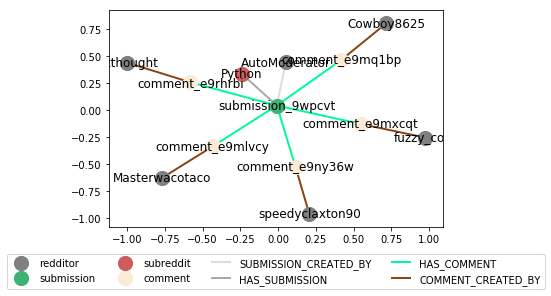

In [24]:
# Draw the graph using graphipy
color_set = set(mcolors.CSS4_COLORS)
options = {
    "node_label": "Label",
    "colorful_edges": True,
    "color_set": color_set
}
legend = exporter.draw_random(nx_graph, options=options, legend=plt)